In [152]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [153]:
csv_path1 = r"C:\Users\oswal\OneDrive\Escritorio\PROGRAMACION\dataset_2do_parcial\1- mental-illnesses-prevalence.csv" 
df_prevalence_mi = pd.read_csv(csv_path1)

csv_path2 = r"C:\Users\oswal\OneDrive\Escritorio\PROGRAMACION\dataset_2do_parcial\2- burden-disease-from-each-mental-illness(1).csv"
df_burden_dis = pd.read_csv(csv_path2)

csv_path3 = r"C:\Users\oswal\OneDrive\Escritorio\PROGRAMACION\dataset_2do_parcial\3- adult-population-covered-in-primary-data-on-the-prevalence-of-major-depression.csv"
df_major_dep = pd.read_csv(csv_path3)

csv_path4 = r"C:\Users\oswal\OneDrive\Escritorio\PROGRAMACION\dataset_2do_parcial\4- adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses.csv"
df_mental_ill = pd.read_csv(csv_path4)

csv_path5 = r"C:\Users\oswal\OneDrive\Escritorio\PROGRAMACION\dataset_2do_parcial\5- anxiety-disorders-treatment-gap.csv"
df_anx_treat = pd.read_csv(csv_path5)

csv_path6 = r"C:\Users\oswal\OneDrive\Escritorio\PROGRAMACION\dataset_2do_parcial\6- depressive-symptoms-across-us-population.csv"
df_dep_sympt = pd.read_csv(csv_path6)

csv_path7 = r"C:\Users\oswal\OneDrive\Escritorio\PROGRAMACION\dataset_2do_parcial\7- number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv"
df_no_countries = pd.read_csv(csv_path7)

# 1) Crear una función llamada "df_ordered" que reciba un dataframe y un str y retorne un  dataframe ordenado de mayor a menor considerando la característica de la str.

In [155]:
# Tabla de datos
array = np.random.uniform(0, 10, size=[8,4])
df = pd.DataFrame(array, index=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], columns=['W', 'X', 'Y', 'Z'])
type (df)
df

,W,X,Y,Z
A,9.574952,2.916618,3.631161,8.123329
B,3.320826,8.220219,1.661507,3.047627
C,7.448920,9.910418,5.040191,6.921083
D,8.018033,4.666816,6.803249,0.595235
E,6.227379,2.578498,1.194015,8.807355
F,7.758653,3.179365,1.936371,8.794496
G,1.868366,0.394278,7.918753,7.154954
H,3.187336,0.601469,8.991006,7.887921


In [156]:
# 1er función mi función
def df_ordered(df, str):
    if str not in df.columns:
        raise ValueError('La columna no se encuentra en el df')
    df_sorted = df.sort_values(by= str, ascending = False)
    return df_sorted

In [157]:
# Ordenar filas de mayor a menor según la columna W
df_ordenado = def_ordered(df, 'Y')
df_ordenado

,W,X,Y,Z
H,3.187336,0.601469,8.991006,7.887921
G,1.868366,0.394278,7.918753,7.154954
D,8.018033,4.666816,6.803249,0.595235
C,7.448920,9.910418,5.040191,6.921083
A,9.574952,2.916618,3.631161,8.123329
F,7.758653,3.179365,1.936371,8.794496
B,3.320826,8.220219,1.661507,3.047627
E,6.227379,2.578498,1.194015,8.807355


In [158]:
# 2) Crear una función llamada "plot_bar" que reciba un dataframe y un str y haga el plot de barras de ese dataframe considerando 
# esa caracterísca descrita por el string

#Definir datos de la tabla
data = {'Categoría': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'C'],
        'Valores': [10, 15, 10, 25, 15, 10, 25, 25]}
df1 = pd.DataFrame(data)
print(type (df1))
print(df1)


#AQUI DEFINIMOS NUESTRA FUNCIÓN
def plot_bar(df1, column, color='green', order_by_frequency=True):

    if column not in df1.columns:
        raise ValueError(f"La columna '{column}' no existe en el DataFrame.")

    count_data = df1[column].dropna().value_counts().reset_index()
    count_data.columns = [column, 'counts']
    
    plt.figure(figsize=(6, 4))

    order = count_data[column] if order_by_frequency else None
    
    sns.barplot(x=column, y='counts', data=count_data, color=color, order=order)

    plt.title(f'Gráfico de barras de {column}', fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    
    plt.show()


<class 'pandas.core.frame.DataFrame'>
  Categoría  Valores
0         A       10
1         B       15
2         A       10
3         C       25
4         B       15
5         A       10
6         C       25
7         C       25


In [159]:
# 3) países con mayor depresión
file_path = r"C:\Users\oswal\OneDrive\Escritorio\PROGRAMACION\dataset_2do_parcial\1- mental-illnesses-prevalence.csv" 
df2 = pd.read_csv(file_path)

#SUMAR EL VALOR DE DEPRESIÓN A LO LARGO DE LOS AÑOS PARA CADA PAÍS
df2_depression = df2.groupby('Entity')['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'].sum()

#SELECCIONAR LOS 22 PAISES CON EL VALOR MAS ALTO DE DEPRESIÓN
top_22_countries = df2_depression.nlargest(22)
print('22 paises con el valor historico más alto de depresión', top_22_countries)
#Muestro 22 países para que se vea más amplia la muestra

22 paises con el valor historico más alto de depresión Entity
Uganda                          214.289735
Palestine                       199.895248
Greenland                       188.616746
Central African Republic        179.397007
Angola                          175.337322
Equatorial Guinea               175.025261
Congo                           174.495063
Gabon                           170.172341
Gambia                          168.496230
Democratic Republic of Congo    164.343550
Rwanda                          163.745728
Lesotho                         160.051131
Greece                          158.564254
Chad                            156.358816
Morocco                         154.213933
Burundi                         152.263772
Tunisia                         150.742825
Afghanistan                     149.042151
Kenya                           148.487286
Mozambique                      147.584333
Nepal                           147.534802
Guyana                          147

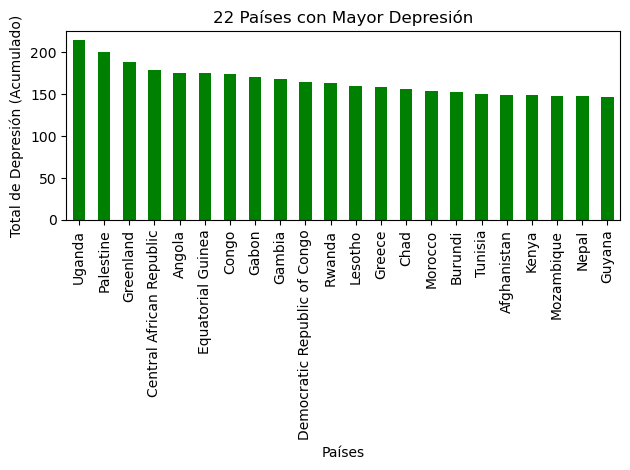

In [160]:
# 4) gráfica de barras mostrando el valor de depresión y la entidad (país)

#Aquí creamos la gráfica de barras para los 22 países con valores más altos y especificamos
#algunas características.
top_22_countries.plot(kind='bar', color='green')
plt.xlabel('Países')
plt.ylabel('Total de Depresión (Acumulado)')
plt.title('22 Países con Mayor Depresión')
plt.tight_layout()
plt.show()


In [161]:
# 5) Países con mayor desorden alimenticio
file_path = r"C:\Users\oswal\OneDrive\Escritorio\PROGRAMACION\dataset_2do_parcial\1- mental-illnesses-prevalence.csv" 
df3 = pd.read_csv(file_path)

#SUMAR EL VALOR DE DESORDEN ALIMENTICIO A LO LARGO DE LOS AÑOS PARA CADA PAÍS
df3_desalimenticio = df3.groupby('Entity')['Eating disorders (share of population) - Sex: Both - Age: Age-standardized'].sum()

#SELECCIONAR LOS SEIS PAISES CON UN VALOR MAS ALTO
top1_22_countries = df3_desalimenticio.nlargest(22)
print('22 paises con el valor historico más alto de desordenes alimenticios',top1_22_countries)


22 paises con el valor historico más alto de desordenes alimenticios Entity
Australia        26.688620
Monaco           23.158898
New Zealand      16.944654
Spain            16.130305
Italy            15.992242
Luxembourg       15.535935
San Marino       15.357607
Austria          15.155793
Andorra          14.939717
Switzerland      14.435346
Finland          13.844072
Sweden           13.673389
Greenland        13.620299
Denmark          13.283602
United States    13.278456
France           13.234632
Norway           13.150363
Brunei           12.906753
Greece           12.663726
Canada           12.480921
Iceland          12.430616
Belgium          12.102251
Name: Eating disorders (share of population) - Sex: Both - Age: Age-standardized, dtype: float64


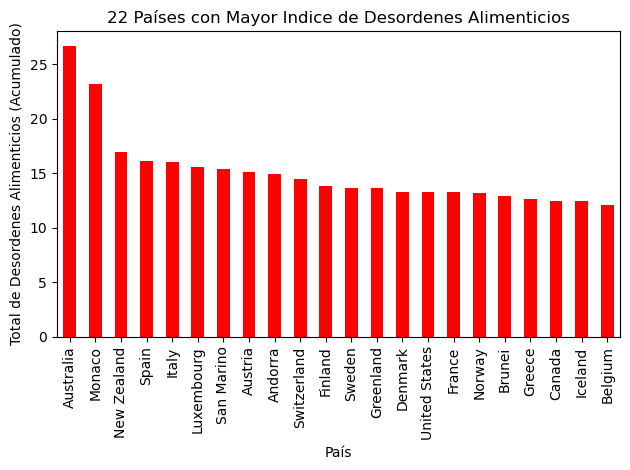

In [162]:
# 6) gráfica de barras mostrando el valor de desorden alimenticio y la entidad (país)

#AQUI CREAMOS LA GRAFICA DE BARRAS PARA LOS PAISES CON VALORES MAS ALTOS Y ESPECIFICAMOS
#ALGUNAS CARACTERISTICCAS DE NUESTRA IMAGEN
top1_22_countries.plot(kind='bar', color='red')
plt.xlabel('País')
plt.ylabel('Total de Desordenes Alimenticios (Acumulado)')
plt.title('22 Países con Mayor Indice de Desordenes Alimenticios')
plt.tight_layout()
plt.show()

In [163]:
# 7) países con mayor esquizofrenia
file_path = r"C:\Users\oswal\OneDrive\Escritorio\PROGRAMACION\dataset_2do_parcial\1- mental-illnesses-prevalence.csv" 
df4 = pd.read_csv(file_path)

#SUMAR EL VALOR DE ESQUIZOFFRENIA A LO LARGO DE LOS AÑOS PARA CADA PAÍS
df4_desalimenticio = df4.groupby('Entity')['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'].sum()

#SELECCIONAR LOS SEIS PAISES CON UN VALOR MAS ALTO
top2_22_countries = df4_desalimenticio.nlargest(22)
print('8 paises con el valor historico más alto de esquizofrenia',top2_22_countries)


8 paises con el valor historico más alto de esquizofrenia Entity
United States               13.484385
New Zealand                 11.684841
Australia                   11.656592
Netherlands                 11.381233
Greenland                   11.359072
Ireland                     10.780793
America (IHME GBD)          10.259163
High-income countries        9.914049
Guam                         9.843255
Northern Mariana Islands     9.553185
Chile                        9.464573
Singapore                    9.439887
Vietnam                      9.437347
Uruguay                      9.354230
Cook Islands                 9.343218
Argentina                    9.337179
American Samoa               9.258940
Malaysia                     9.232544
Seychelles                   9.203227
Brunei                       9.151568
Israel                       9.098833
China                        9.085934
Name: Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized, dtype: flo

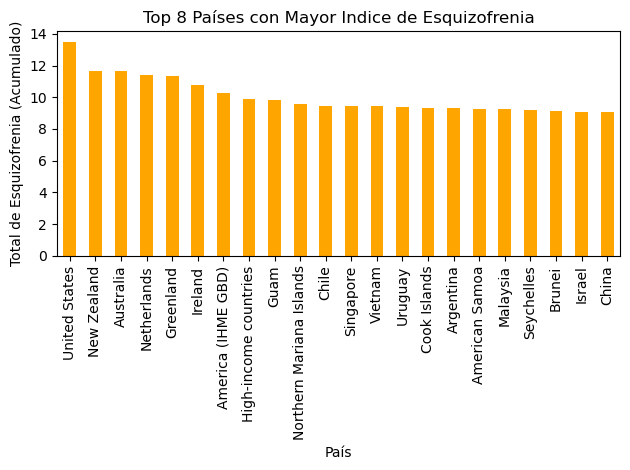

In [164]:
# 8) gráfica de barras mostrando el valor de esquizofrenia y la entidad (país)

#AQUI CREAMOS LA GRAFICA DE BARRAS PARA LOS PAISES CON VALORES MAS ALTOS Y ESPECIFICAMOS
#ALGUNAS CARACTERISTICCAS DE NUESTRA IMAGEN
top2_22_countries.plot(kind='bar', color='orange')
plt.xlabel('País')
plt.ylabel('Total de Esquizofrenia (Acumulado)')
plt.title('Top 8 Países con Mayor Indice de Esquizofrenia')
plt.tight_layout()
plt.show()


In [165]:
# 9) crear un data frame con los valores por país de ["Entity Code", "Year", "Schizophrenia disorders", "Depressive
# disorders", "Anxiety disorders", "Bipolar disorders", "Eating disorders"]
file_path = r"C:\Users\oswal\OneDrive\Escritorio\PROGRAMACION\dataset_2do_parcial\1- mental-illnesses-prevalence.csv"
data2 = pd.read_csv(file_path)

df5 = data2[['Entity', 'Code', 'Year',
           'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
           'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
           'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
           'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
           'Eating disorders (share of population) - Sex: Both - Age: Age-standardized']]

#AQUI RENOMBRAMOS LAS COLUMNAS
df5.columns = ['Country', 'Code', 'Year', 'Schizophrenia', 'Depressive', 'Anxiety', 'Bipolar', 'Eating']

# Mostrar las primeras filas del DataFrame
df5


,Country,Code,Year,Schizophrenia,Depressive,Anxiety,Bipolar,Eating
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652
6416,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662
6417,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330
6418,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909


In [166]:
# 10) mostrar los estadísticos del dataframe anterior
df5.describe()

,Year,Schizophrenia,Depressive,Anxiety,Bipolar,Eating
count,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000
mean,2004.500000,0.266604,3.767036,4.101840,0.636968,0.195664
std,8.656116,0.039383,0.925286,1.050543,0.233391,0.138380
min,1990.000000,0.188416,1.522333,1.879996,0.181667,0.044780
25%,1997.000000,0.242267,3.080036,3.425846,0.520872,0.096416
50%,2004.500000,0.273477,3.636772,3.939547,0.579331,0.144150
75%,2012.000000,0.286575,4.366252,4.564164,0.844406,0.251167
max,2019.000000,0.462045,7.645899,8.624634,1.506730,1.031688


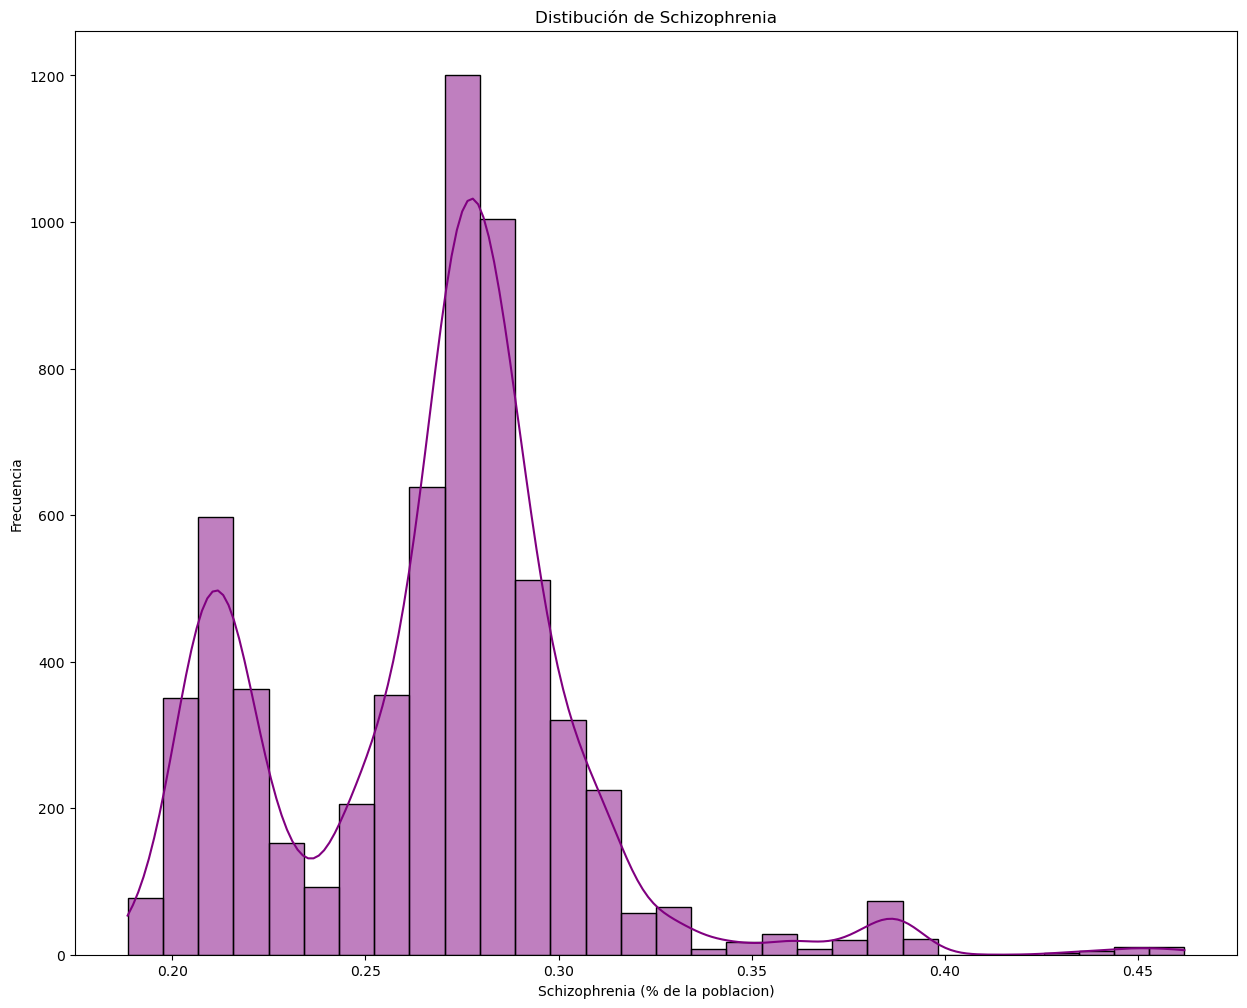

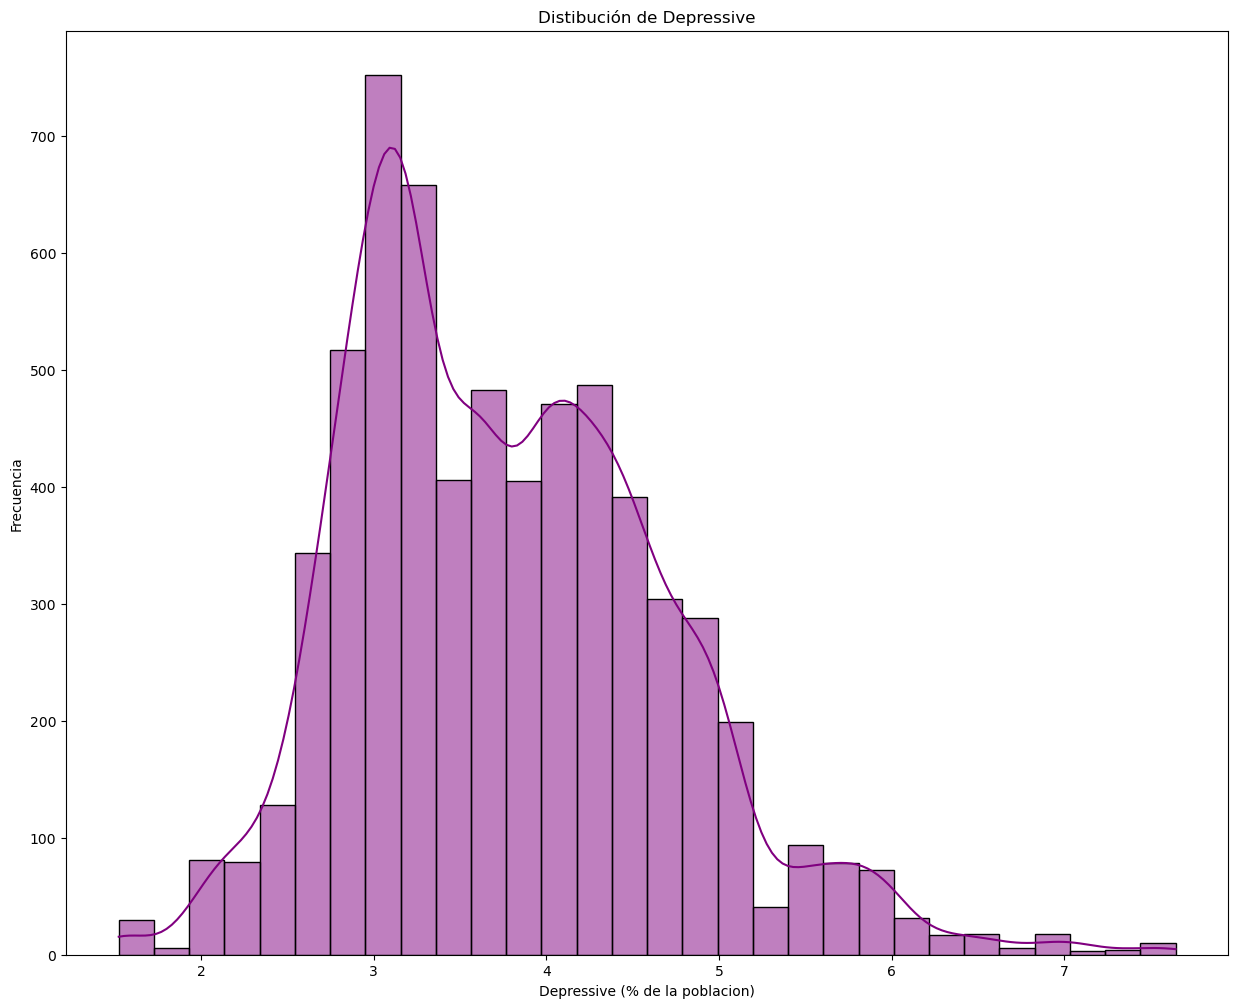

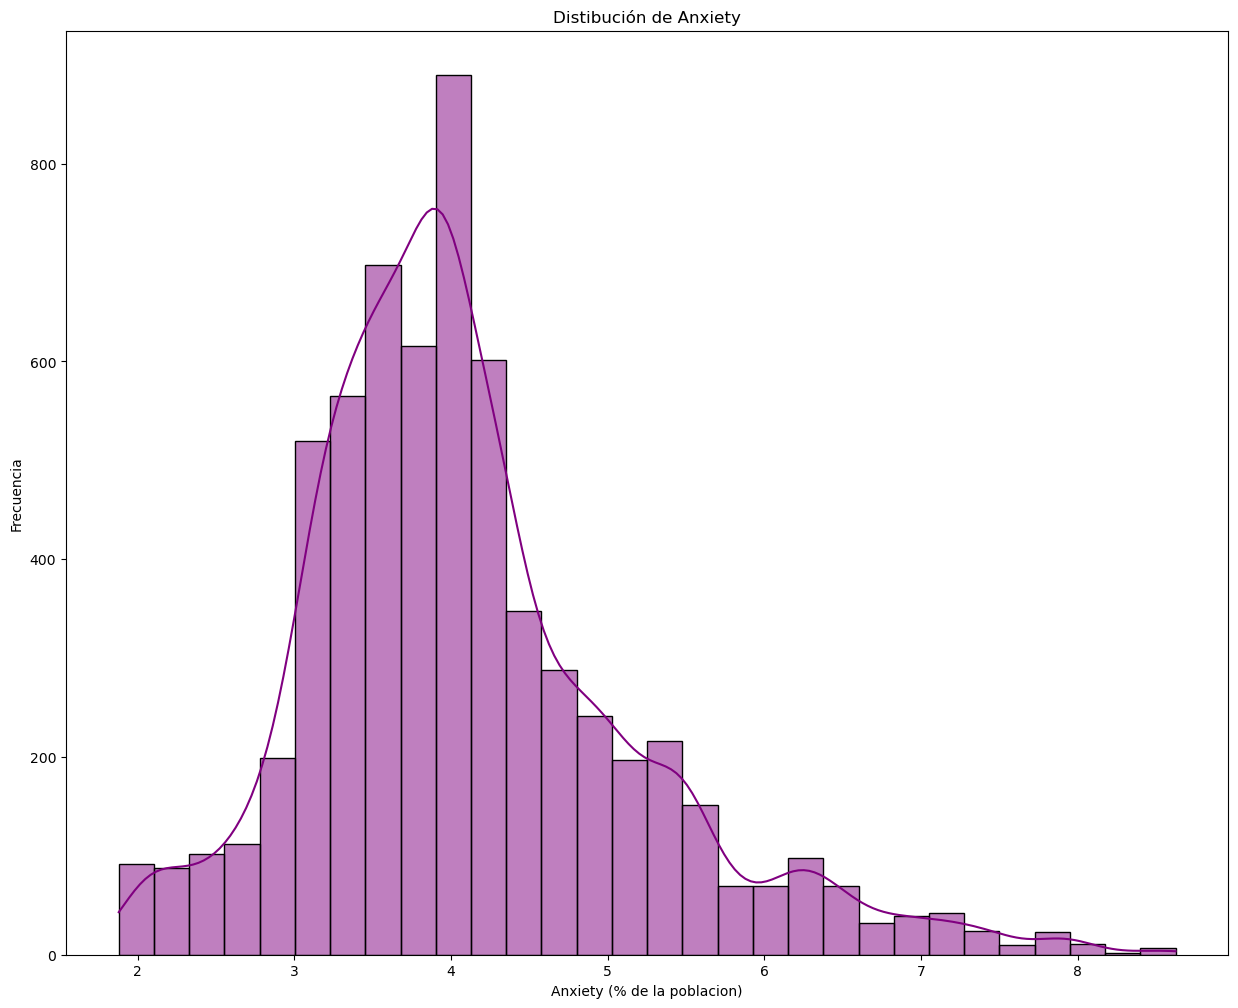

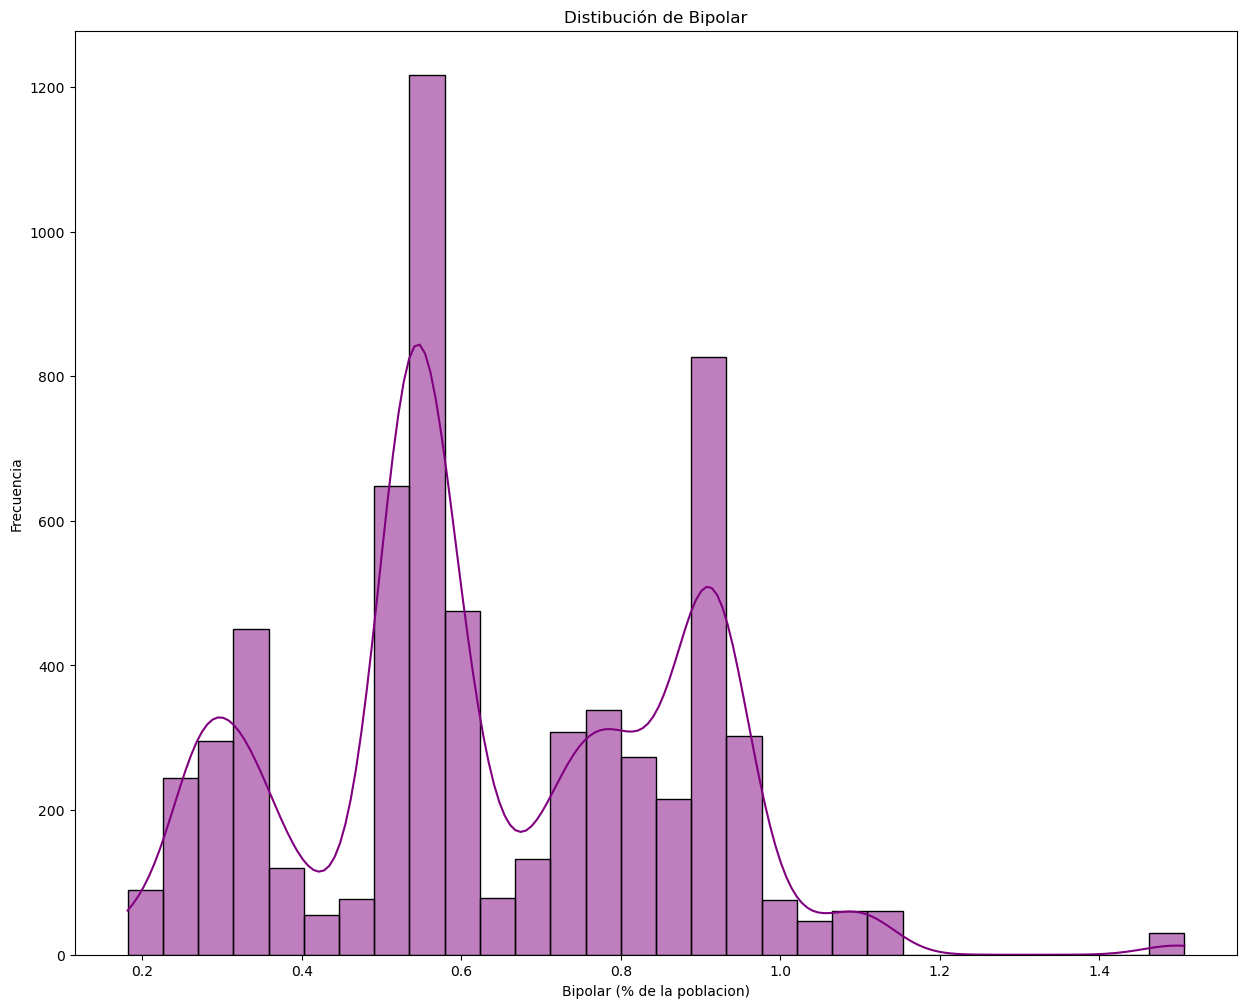

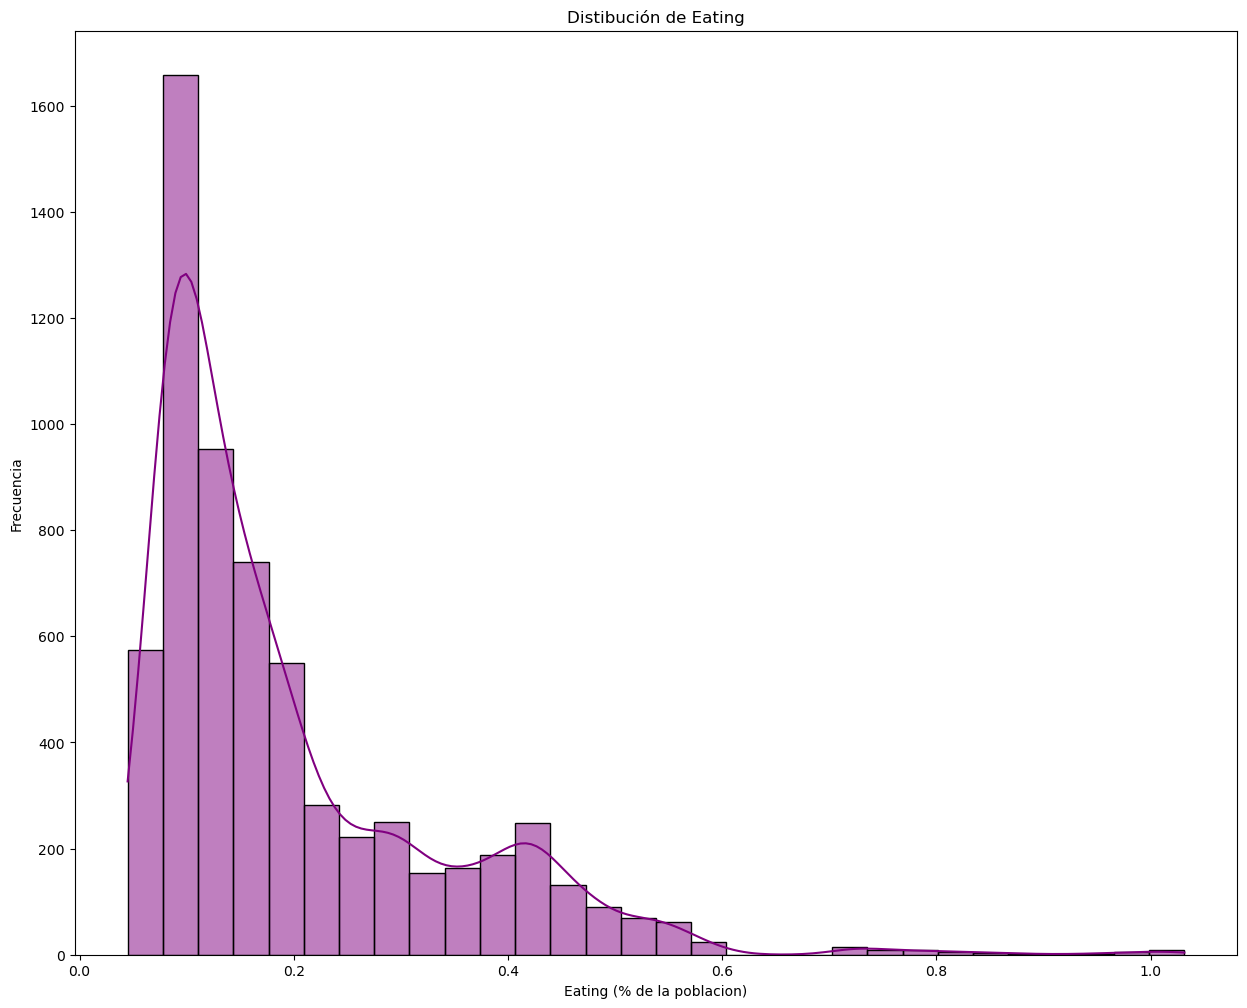

In [167]:
# 11) mostrar la distribución de cada feature del dataframe anterior

#AQUI GENERAMOS LOS HISTOGRAMAS PARA CADA COLUMNA
df5.columns = ['Country', 'Code', 'Year', 'Schizophrenia', 'Depressive', 'Anxiety', 'Bipolar', 'Eating']

features = ['Schizophrenia', 'Depressive', 'Anxiety', 'Bipolar', 'Eating']

for feature in features:
    plt.figure(figsize=(15, 12))
    sns.histplot(df5[feature], kde=True, bins=30, color='purple')
    plt.title(f'Distibución de {feature}')
    plt.xlabel(f'{feature} (% de la poblacion)')
    plt.ylabel('Frecuencia')
    plt.tight_layout
    plt.show()


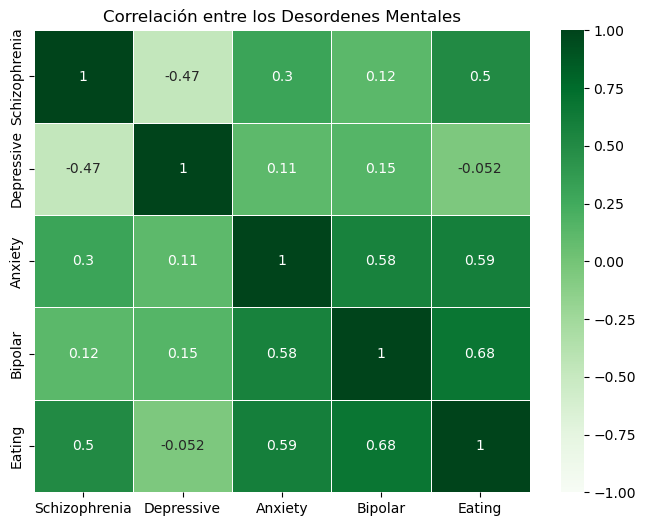

In [168]:
# 12) mostrar en un mapa de color la correlación entre las features ["Schizophrenia disorders", "Depressive disorders",
# "Anxiety disorders", "Bipolar disorders", "Eating disorders"]

#AQUI CALCULAMOS LA MATRIZ DE CORRELACION ENTRE LOS FEATURES
corr_matrix = df5[['Schizophrenia', 'Depressive', 'Anxiety', 'Bipolar', 'Eating']].corr()

#AQUI GENERAMOS NUESTRO MAPA DE CALOR
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlación entre los Desordenes Mentales')
plt.show()


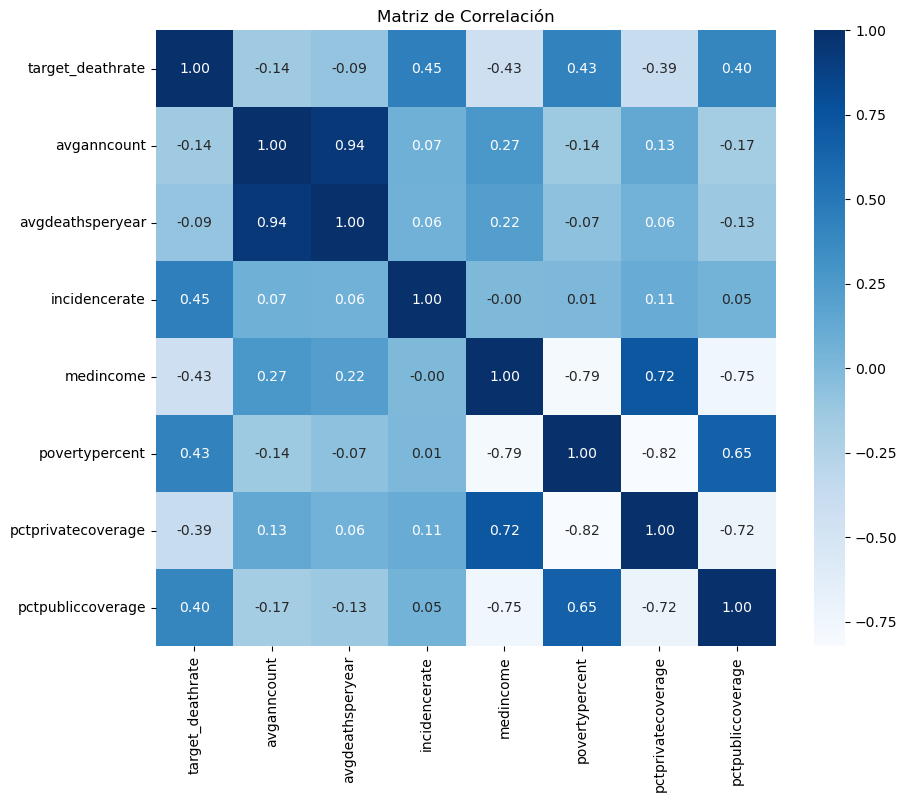

In [169]:
# 13) Del dataset cancer_reg visto en clase, determinar: la correlación entre las features [ 'target_deathrate', 'avganncount',
# 'avgdeathsperyear', 'incidencerate', 'medincome', 'povertypercent', 'pctprivatecoverage', 'pctpubliccoverage' ]

df6 = pd.read_csv(r"C:\Users\oswal\OneDrive\Escritorio\PROGRAMACION\cancer_regression\cancer_reg.csv")

#SELECCIONAMOS LAS COLUMNAS
columnas_cancer = ['target_deathrate', 'avganncount', 'avgdeathsperyear', 'incidencerate',
        'medincome', 'povertypercent', 'pctprivatecoverage', 'pctpubliccoverage']

#PARA CALCULAR LA MATRIZ DE CORRELACION
corr_matrix = df6[columnas_cancer].corr()

#NUESTRO MAPA DE CALOR A PARTIR DE LA MATRIZ DE CORRELACION
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


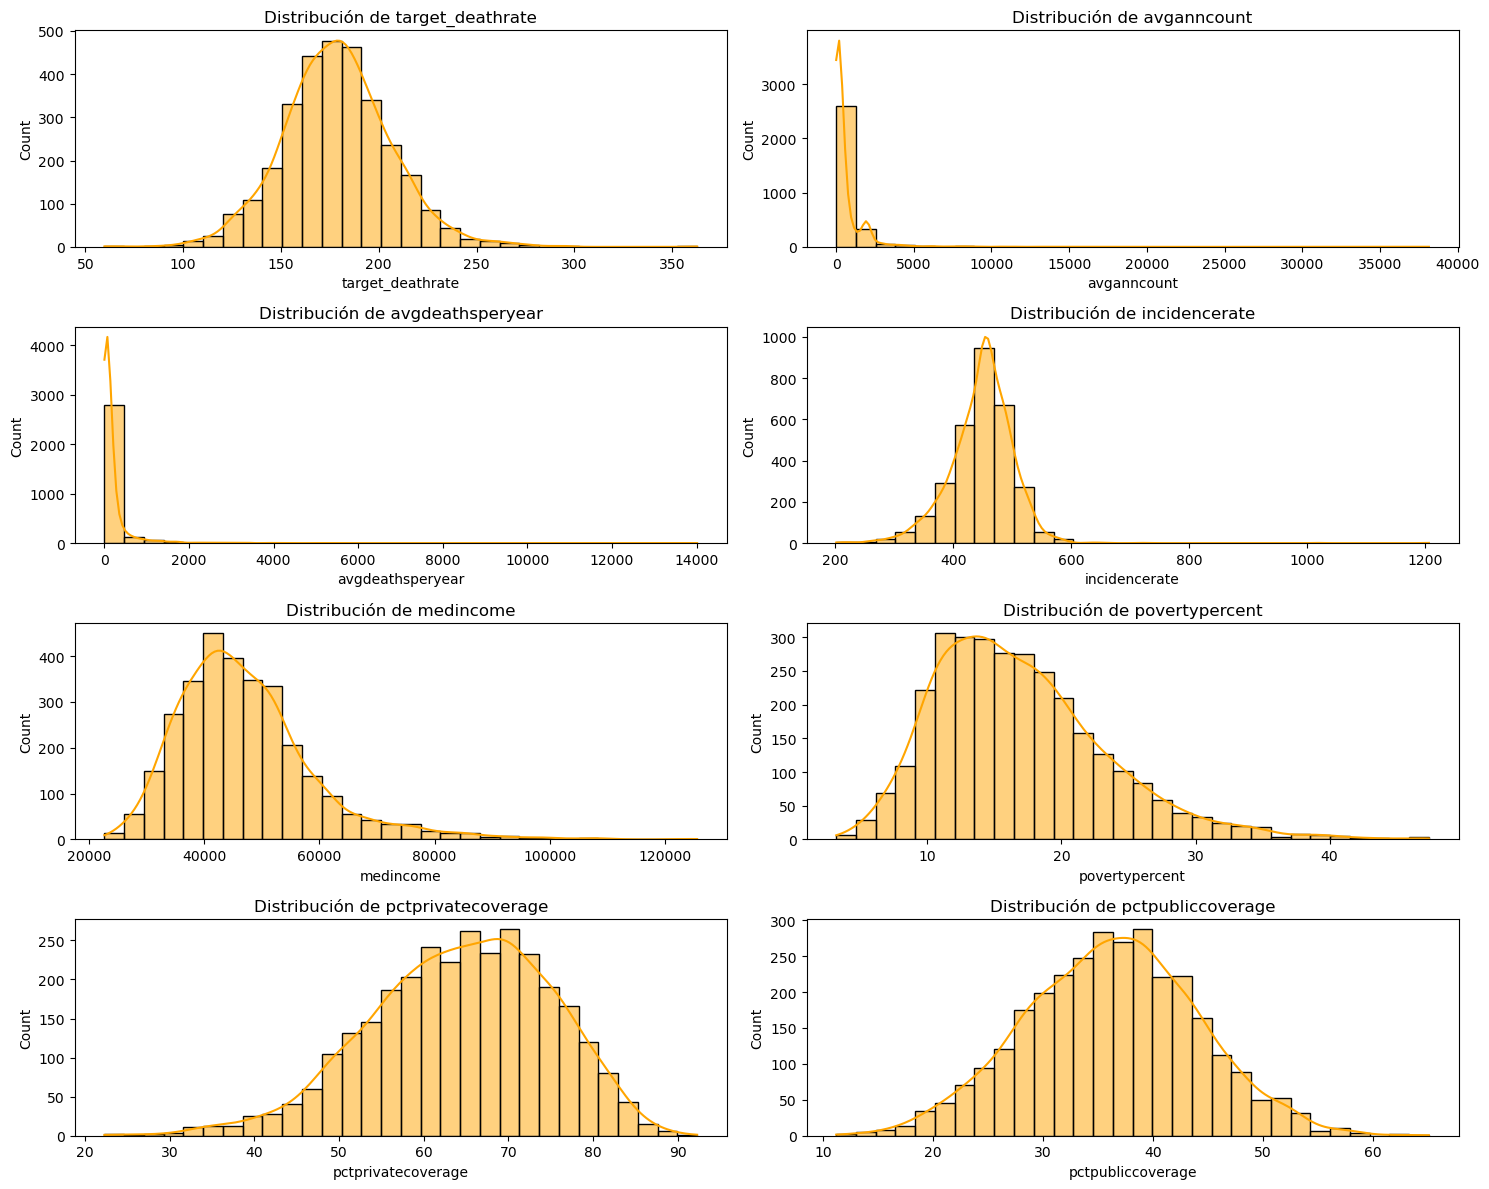

In [170]:
# 13.1) Del dataset cancer_reg visto en clase, determinar: mostrar la distribución de cada feature del dataframe anterior

df6 = pd.read_csv(r"C:\Users\oswal\OneDrive\Escritorio\PROGRAMACION\cancer_regression\cancer_reg.csv")

#AQUI SELECCIONAMOS LAS COLUMNAS QUE NOS INTERESAN
columnas_cancer = ['target_deathrate', 'avganncount', 'avgdeathsperyear', 'incidencerate', 'medincome', 'povertypercent',
                   'pctprivatecoverage', 'pctpubliccoverage']

#AQUI GRAFICAMOS LA DISTRIBUCION DE CADA COLUMNA
plt.figure(figsize=(15, 12))
for i, col in enumerate(columnas_cancer):
    plt.subplot(4, 2, i + 1)
    sns.histplot(df6[col], kde=True, bins=30, color = 'orange')
    plt.title(f'Distribución de {col}')

plt.tight_layout()
plt.show()


Pendiente (slope): -0.0009879254369537403
Intercepto (intercept): 225.15907636477237
Coeficiente de correlación (R^2): 0.1837107557079958
Valor p (p-value): 2.0418098344918484e-136
Error estándar (std_err): 3.773855476927912e-05


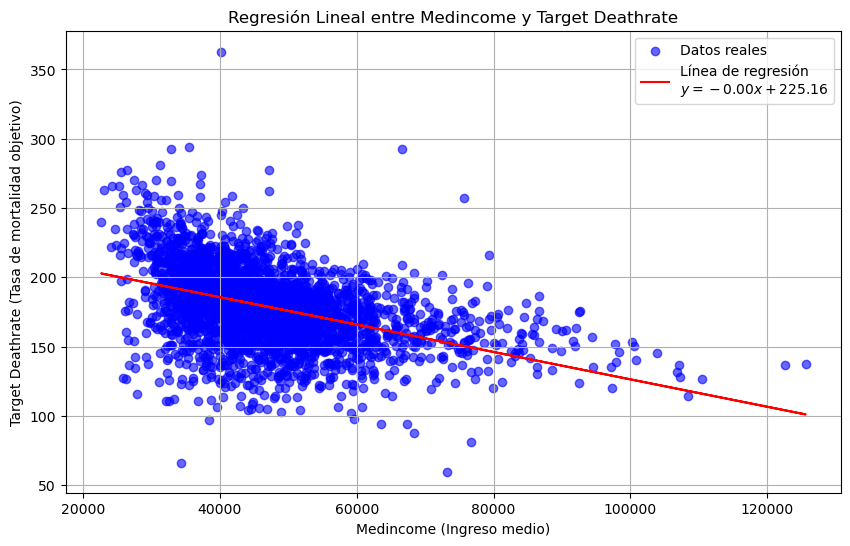

In [171]:
# 13.2) Del dataset cancer_reg visto en clase, determinar: aquellos que dependencia lineal encontrar los valores de la
# recta. hint: scipy
from scipy import stats

df6 = pd.read_csv(r"C:\Users\oswal\OneDrive\Escritorio\PROGRAMACION\cancer_regression\cancer_reg.csv")

#SELECCIONAMOS COLUMNAS
X = df6['medincome']  # Ejemplo usando 'medincome' como variable independiente
Y = df6['target_deathrate']  # Ejemplo usando 'target_deathrate' como dependiente

# Encontrar los valores de la recta (pendiente, intercepto, etc.)
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

# Crear la línea de predicción
regression_line = slope * X + intercept

# Mostrar los resultados
print(f'Pendiente (slope): {slope}')
print(f'Intercepto (intercept): {intercept}')
print(f'Coeficiente de correlación (R^2): {r_value**2}')
print(f'Valor p (p-value): {p_value}')
print(f'Error estándar (std_err): {std_err}')

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label='Datos reales', color='blue', alpha=0.6)
plt.plot(X, regression_line, color='red', label=f'Línea de regresión\n$y = {slope:.2f}x + {intercept:.2f}$')
plt.title('Regresión Lineal entre Medincome y Target Deathrate')
plt.xlabel('Medincome (Ingreso medio)')
plt.ylabel('Target Deathrate (Tasa de mortalidad objetivo)')
plt.legend()
plt.grid(True)
plt.show()
